In [348]:
import pandas as pd
import numpy as np

In [349]:
df = pd.read_csv('train2.csv')

df

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,id-001,4.98,0.55,e,n,y,8.29,1.29,-8.60,-20.77,-15.64,NaN
1,id-002,3.71,6.33,g,n,v,9.84,-1.12,-4.00,-18.82,-7.02,D
2,id-003,26.50,NaN,e,o,v,21.63,20.27,13.96,3.36,0.66,D
3,id-004,11.39,6.29,h,o,w,0.70,11.14,7.19,15.62,1.59,A
4,id-005,5.95,4.40,f,l,v,30.71,6.22,30.21,4.33,-4.27,D
...,...,...,...,...,...,...,...,...,...,...,...,...
485,id-486,20.57,1.46,g,p,x,-21.54,21.11,-52.55,-24.60,4.89,B
486,id-487,17.58,-3.73,e,l,w,-3.04,-21.11,38.80,29.34,-1.71,A
487,id-488,9.29,4.58,e,n,u,-9.01,-14.15,9.94,8.72,-2.94,C
488,id-489,7.59,9.15,f,p,w,4.35,16.51,-9.61,-4.13,-12.14,D


**Clean Data**

In [350]:
df['id'] = df['id'].fillna(0)
features = ['x1','x2','x6','x7','x8','x9','x10']
for col in features:
    df[col] = df[col].fillna(0)

df = df.dropna()

cols = ['x3','x4','x5']

for i in cols:
    df[i] = df[i].apply(ord)

C:\Users\chiss\AppData\Local\Temp\ipykernel_4580\1881437147.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].apply(ord)


In [351]:
df.isnull().sum()

id     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
y      0
dtype: int64

In [352]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



In [353]:
df.head()

feature_cols = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
X = df[feature_cols]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



<AxesSubplot: >

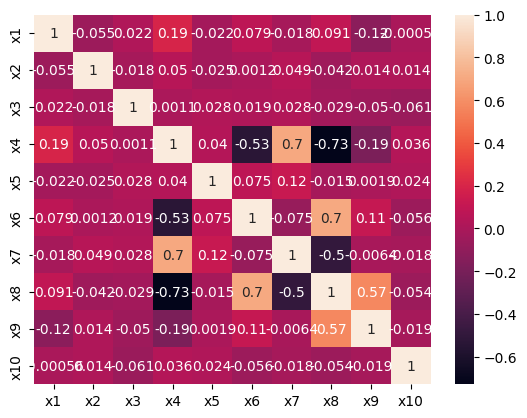

In [354]:
import seaborn as sns
sns.heatmap(X.corr(),annot=True )

In [355]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [356]:
print("Accuracy:", clf.score(X, y))


Accuracy: 0.8824833702882483


In [357]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.59      0.69      0.64        32
           B       0.58      0.42      0.48        36
           C       0.59      0.65      0.62        37
           D       0.69      0.71      0.70        31

    accuracy                           0.61       136
   macro avg       0.61      0.62      0.61       136
weighted avg       0.61      0.61      0.60       136



In [358]:
df1 = pd.read_csv("unseen2.csv")
cols = ['x3','x4','x5']

for i in cols:
    df1[i] = df1[i].apply(ord)
    
df1

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,Q01,-2.24,-11.02,105,110,120,-2.43,-7.96,-2.64,-6.95,-0.66
1,Q02,4.39,4.57,103,110,118,-23.36,-24.85,-7.10,-3.45,4.55
2,Q03,13.97,-19.62,104,111,118,-11.54,-4.35,-7.56,-2.20,1.27
3,Q04,-26.99,1.47,104,109,121,5.15,8.84,17.05,28.64,3.49
4,Q05,11.27,8.28,102,108,120,17.51,-16.32,28.68,-2.76,1.35
5,Q06,11.74,-19.99,103,110,118,3.99,3.63,5.96,3.27,-8.77
6,Q07,16.73,3.39,104,110,121,18.50,5.54,8.22,-11.04,-12.54
7,Q08,-7.05,13.25,101,108,119,9.60,-20.72,32.16,11.25,-2.96
8,Q09,12.91,0.21,105,111,118,10.20,14.11,-5.99,-10.08,12.28
9,Q10,24.89,8.38,102,110,121,-3.53,-10.54,9.60,1.48,-6.34


In [359]:
cols = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
X_new = df1[cols]

X_new

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-2.24,-11.02,105,110,120,-2.43,-7.96,-2.64,-6.95,-0.66
1,4.39,4.57,103,110,118,-23.36,-24.85,-7.10,-3.45,4.55
2,13.97,-19.62,104,111,118,-11.54,-4.35,-7.56,-2.20,1.27
3,-26.99,1.47,104,109,121,5.15,8.84,17.05,28.64,3.49
4,11.27,8.28,102,108,120,17.51,-16.32,28.68,-2.76,1.35
5,11.74,-19.99,103,110,118,3.99,3.63,5.96,3.27,-8.77
6,16.73,3.39,104,110,121,18.50,5.54,8.22,-11.04,-12.54
7,-7.05,13.25,101,108,119,9.60,-20.72,32.16,11.25,-2.96
8,12.91,0.21,105,111,118,10.20,14.11,-5.99,-10.08,12.28
9,24.89,8.38,102,110,121,-3.53,-10.54,9.60,1.48,-6.34


In [360]:
new_pred = clf.predict(X_new)



new_pred

array(['D', 'C', 'C', 'C', 'B', 'B', 'D', 'B', 'D', 'B'], dtype=object)